In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


-- We mounted ther drive over google colab  as usual to have access to the files

In [0]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import renders as rs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("/content/drive/My Drive/Wholesale customers data.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print ("Uploaded Wholesale customers dataset successfully.")
except:
    print ("Dataset could not be loaded. Is the dataset missing?")

Uploaded Wholesale customers dataset successfully.


In [0]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Here we see that the data needs to be preprocessed and normalized .. as usual

In [0]:
# TODO: Select three indices of to sample from the dataset
indices = [26,176,392]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9898,961,2861,3151,242,833
1,45640,6958,6536,7368,1532,230
2,518,4180,3600,659,122,654


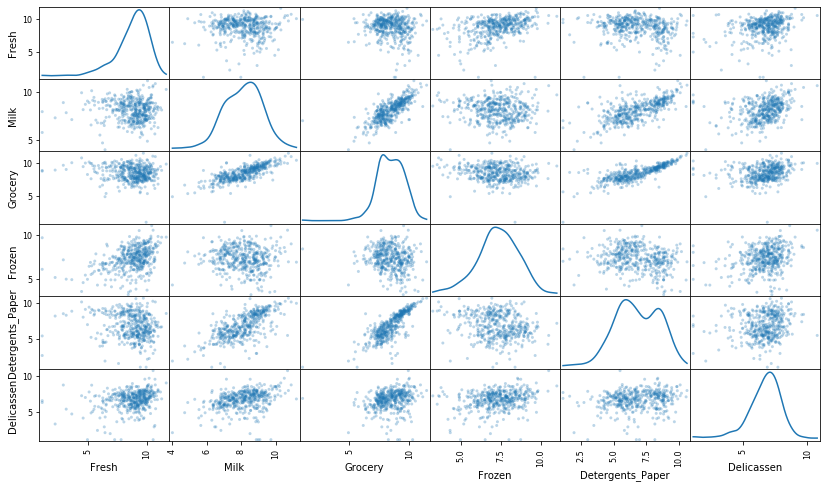

In [0]:
from pandas.plotting import scatter_matrix

# TODO: Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(x))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x))

# Produce a scatter matrix for each pair of newly-transformed features
scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [0]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.200088,6.867974,7.958926,8.055475,5.488938,6.725034
1,10.728540,8.847647,8.785081,8.904902,7.334329,5.438079
2,6.249975,8.338067,8.188689,6.490724,4.804021,6.483107


In [0]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) * 1.5
    
    # Display the outliers
    print ("Data points considered outliers for the feature:")
    print(feature)
    out = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(out)
    outliers = outliers + list(out.index.values)
    

#Creating list of more outliers which are the same for multiple features.
outliers = list(set([x for x in outliers if outliers.count(x) > 1]))    

print ("Outliers:" )
print(outliers)

# Remove the outliers, if any were specified 
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print ("The good dataset now has {} observations after removing outliers.")
print(len(good_data))

Data points considered outliers for the feature:
Fresh


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature:
Milk


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature:
Grocery


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature:
Frozen


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature:
Detergents_Paper


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature:
Delicassen


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outliers:
[128, 65, 66, 75, 154]
The good dataset now has {} observations after removing outliers.
435


array([[-1.75798340e+00,  9.71115036e-03, -9.59028752e-01,
        -1.68244965e+00,  2.68019408e-01, -3.89130824e-01],
       [-1.78866450e+00, -8.12250544e-01,  2.31474403e-01,
        -3.63127135e-03,  1.19381382e-01, -2.10647737e-01],
       [-1.88335350e+00, -1.59913512e+00,  1.32039312e+00,
        -5.43245556e-01, -3.93354905e-01, -3.11668729e-01],
       ...,
       [-3.74253498e+00, -8.56145640e-01, -9.88483168e-01,
        -8.87897232e-01,  5.02600793e-02,  2.05776604e-01],
       [ 1.66914714e+00, -3.97968032e-01,  5.16104595e-01,
        -1.31886068e+00,  9.13006151e-02,  5.61145684e-03],
       [ 7.39011451e-01,  3.69144772e+00, -2.03347706e+00,
        -9.92689393e-01,  3.10907713e-01, -1.73399536e-01]])

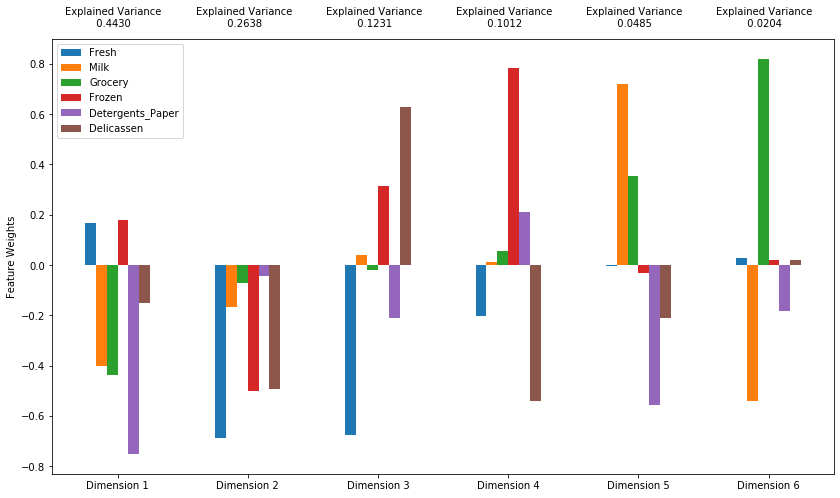

In [0]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA().fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(good_data)
# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

pca_samples


In [0]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(good_data)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [0]:
# Imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [0]:
# Create range of clusters , different to know best
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [0]:
# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.42628101546910835
For n_clusters = 3. The average silhouette_score is : 0.39418735404519234
For n_clusters = 4. The average silhouette_score is : 0.3311955841612473
For n_clusters = 5. The average silhouette_score is : 0.34999779752629756
For n_clusters = 6. The average silhouette_score is : 0.3550750427851982
For n_clusters = 7. The average silhouette_score is : 0.36350322430458637
For n_clusters = 8. The average silhouette_score is : 0.35619681173800954
For n_clusters = 9. The average silhouette_score is : 0.3635081937033843
For n_clusters = 10. The average silhouette_score is : 0.36518099877657767


-- Evaluation:

Here we see that the best silhouette score is in the cluster of 2, with a value of 0.43 that means that the data there is most similar to one another

In [0]:
clusterer = KMeans(n_clusters=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)

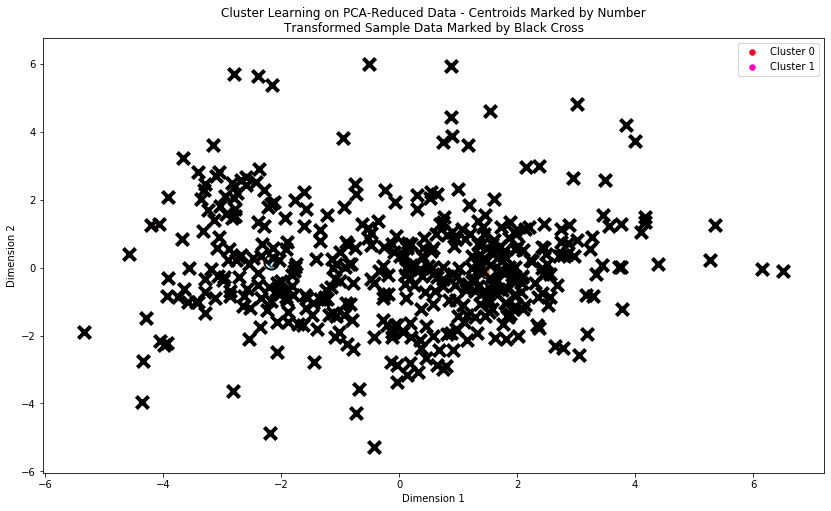

In [0]:


rs.cluster_results(reduced_data, preds, centers, pca_samples)

In [0]:
from sklearn.cluster import AgglomerativeClustering
# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='average').fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.fit_predict(reduced_data)

    # TODO: Predict the cluster for each transformed sample data point
    #sample_preds = clusterer.fit_predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))


For n_clusters = 2. The average silhouette_score is : 0.41483313908294017
For n_clusters = 3. The average silhouette_score is : 0.34774762569920686
For n_clusters = 4. The average silhouette_score is : 0.22001177956625667
For n_clusters = 5. The average silhouette_score is : 0.18419599314500076
For n_clusters = 6. The average silhouette_score is : 0.3288322474560961
For n_clusters = 7. The average silhouette_score is : 0.33541668121672813
For n_clusters = 8. The average silhouette_score is : 0.3251085297289744
For n_clusters = 9. The average silhouette_score is : 0.3150050063877363
For n_clusters = 10. The average silhouette_score is : 0.2869117209212231


In [0]:
clusterer = AgglomerativeClustering(n_clusters=2).fit(reduced_data)
preds = clusterer.fit_predict(pca_samples)
sample_preds = clusterer.fit_predict(pca_samples)

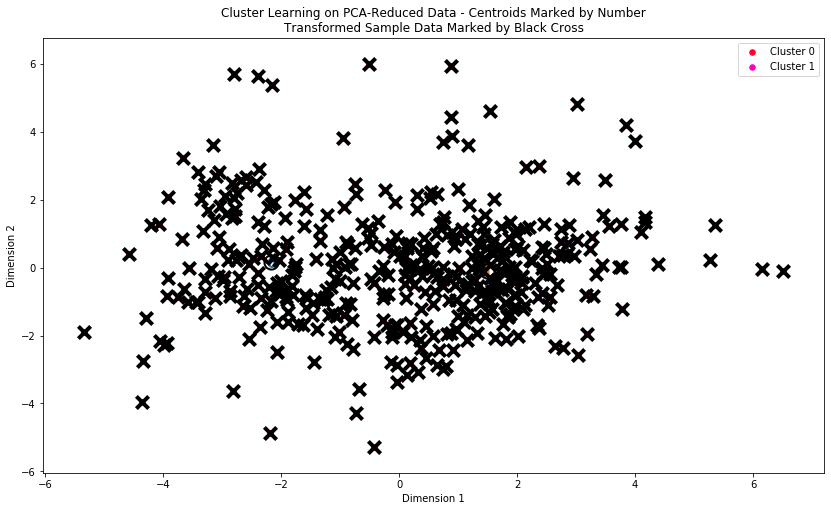

In [0]:
rs.cluster_results(reduced_data, preds, centers, pca_samples)

In [0]:
from sklearn.cluster import AgglomerativeClustering
# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete').fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.fit_predict(reduced_data)

    # TODO: Predict the cluster for each transformed sample data point
    #sample_preds = clusterer.fit_predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.11624213626118997
For n_clusters = 3. The average silhouette_score is : 0.2379364352525283
For n_clusters = 4. The average silhouette_score is : 0.2676199871457371
For n_clusters = 5. The average silhouette_score is : 0.24302207219216693
For n_clusters = 6. The average silhouette_score is : 0.23505868325861898
For n_clusters = 7. The average silhouette_score is : 0.2829926866266808
For n_clusters = 8. The average silhouette_score is : 0.25867128128209915
For n_clusters = 9. The average silhouette_score is : 0.2622959218670386
For n_clusters = 10. The average silhouette_score is : 0.2783270236986244


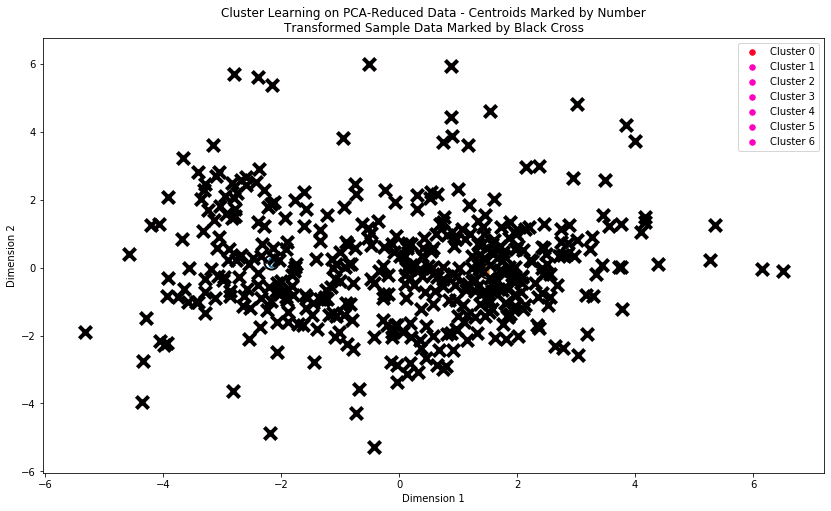

In [0]:
clusterer = AgglomerativeClustering(n_clusters=7).fit(reduced_data)
preds = clusterer.fit_predict(reduced_data)
sample_preds = clusterer.fit_predict(pca_samples)
rs.cluster_results(reduced_data, preds, centers, pca_samples)